##### Setup code

In [1]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from ipywidgets import *
np.set_printoptions(precision=3, suppress=True, linewidth=100)

### Functions for plotting
colors = ["#88e99a", "#258387", "#54d7eb", "#2379cc", "#b1c8eb", "#8265cd", "#8711ac", "#eb6be6", "#af2168", "#daa7e7"]

plt.style.use('dark_background')
def nice_plots_orbit(fig,ax,lims):
    """ 
    Plots nice orbit figures. 
    Parameters:
    - fig: figure to store plot
    - ax: the axes to plot on
    - lims: limits of axes
    """
    [[x_low, x_high],[y_low, y_high]] = lims
    # Axes styling
    plt.style.use('dark_background')
    plt.gca().set_aspect('equal', adjustable='box')
    # Customize ticks
    plt.xticks([], color="white", fontsize=10)
    plt.yticks([], color="white", fontsize=10)

    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    scale = x_high-x_low
    plt.arrow(x_low, 0, x_high-x_low, 0, head_width=0.025*scale, head_length=0.025*scale, fc='white', ec='white')
    plt.arrow(0, y_low, 0, y_high-y_low, head_width=0.025*scale, head_length=0.025*scale, fc='white', ec='white')
    xtick_positions = [x_low, x_high]
    ytick_positions = [y_low, y_high]

    for pos in xtick_positions:
        # X-axis ticks
        plt.plot([pos, pos], [-0.01*scale, -0.01*scale], color="white", lw=1)
        plt.text(pos, -0.05*scale, f"{pos}", color="white", ha="center", va="center", fontsize=10)
    for pos in ytick_positions:
        # Y-axis ticks
        plt.plot([-0.01*scale, -0.01*scale], [pos, pos], color="white", lw=1)
        plt.text(-0.05*scale, pos, f"{pos}", color="white", ha="center", va="center", fontsize=10)

def nice_plots_time(fig,ax):
    """ 
    Plots nice figures of position (x) vs time (t). 
    Parameters:
    - fig: figure to store plot
    - ax: the axes to plot on
    """
    plt.style.use('dark_background')
    # Remove upper and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlim(0)

#Prepares a layout for orbit plots
def plot_labels(ax,title="",xlab="",ylab="",fontsize=14):
    """
    Parameters:
    - title: title of plot
    - xlab: label of x-axis
    - ylab: label of y-axis
    """
    #   Refine plot
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel(xlab, fontsize=fontsize)
    ax.set_ylabel(ylab,fontsize=fontsize)

# The Dynamics of Small Time-Discrete Recurrent Neural Networks

Barton Muller, Bram Timmermans, Sophia Wellman

Recurrent neural networks (RNNs) are a class of artificial neural networks most commonly used for sequential data processing. They process data across multiple time steps using a feedback loop which allows our network to learn from previous inputs and use these in current computations [1]. RNNs have been modelled after the basic feedback mechanisms of neurons in biological brains and therefore also allow us to artificially investigate dynamical behaviour of interacting neurons. Neural networks in biological brains are observed to function as circuits where information passes between neighbouring neurons. Even though such networks are made up of groups of many billion neurons, two- and three neuron networks still exhibit some of the dynamical behaviour that is interesting to investigate [2]. This dynamical behaviour is necessary to study so that we can understand the emergent properties arising from the smaller networks, which can be assumed to also exist in systems of higher dimensions. 

Our project will start by studying the dynamical behaviour of two simple neurons by looking at orbit plots, bifurcations diagrams and iso-periodic plots. We will look at discretised neural networks as this makes it easier to simulate their behaviour. Afterwards, we will take a quick look at the isoperiodic plots we obtain for three neurons.

## Simple neurons expressed by equations

To model the dynamics of small neural networks, we describe the neurons as a set of equations as shown below. 

$$
\begin{align}
x_i (t+1) = \sum_j f(w_{ij}*x_j(t)) + b_i

\end{align}


$$

The weights $$w_{ij}$$ represent the strength of the connection between the neurons and the biases $$b_i$$ represents the offset of the neuron. The function, $$f$$, is the activation function which is responsible for introducing non-linearity to the system. Without this function, the network would essentially behave like a linear regression model which would not create the complex patterns that we are interested in [3]. For a system of two neurons we have two differential equations with two terms (excluding the bias b), and later for three neurons we will work with three differential equations containing three terms each. 

### Determining parameter ranges of interest

To create a network that displays complexity, we will look at a neural network in which one of the neurons receives both excitatory and inhibitory inputs. We start by choosing one of the neurons to be self-inhibitory by setting the weight $$ w_{11}<0 $$. For simplicity we let $$ w_{22}=0 $$. According to Dale's principle, which states that each neuron has either purely exhibitory or inhibitory outputs, $$ w_{21} $$ must also be negative. To decide the sign of the last weight, $$ w_{12} $$, we will use the fact that at least one neuron in the network should have both loops interact competitively. In our case this would mean that the loop neuron 1 has with itself competes with the loop it has with the second neuron. This interaction is described in the following equation:

$$
\begin{align}
\sum_{j=1}^{n} w_{ij} w_{ji} f'(x_j)=0
\end{align}
$$

which is simplified into $$ w_{11}^2f'(x_1) + w_{12}w_{21}f'(x_2) =0 $$. Since the first term is strictly positive for all $$ w_{11} $$, the second term must be negative; $$ w_{12}w_{21} < 0 $$. We know $$w_{21}$$ is negative, thus $$w_{12}$$ must be positive. 

By looking at the stability conditions of the system we can further determine for what weight-ranges we might obtain chaotic behaviour. To find an expression for the stability of the system, we will look at the eigenvalues of its Jacobian matrix,

$$
J = \begin{bmatrix} w_{11}f'(x_1) & w_{12}f'(x_2) \\ w_{21}f'(x_1) & 0 \end{bmatrix}

$$

The eigenvalues can be expressed in terms of the matrix's determinant and trace as follows:

$$
\lambda_{+,-} = \frac{1}{2} * (T \pm \sqrt{T^2 - 4D})
$$

where $$T= w_{11}f'(x_1)$$ is the trace and $$D = - w_{12}w_{21}f'(x_1)f'(x_2)$$ is the determinant.


For an unstable system, both eigenvalues must satisfy $$|\lambda|> 1$$. By finding the conditions for $$T$$ and $$D$$ such that $$|\lambda|=1$$, we can visualise the area for which our system is stable and unstable. 

From multiplying $$\lambda_+$$ with $$\lambda_-$$ and setting this to equal 1, we find the line $$D=1$$. Furthermore, by looking at the equation $$|\lambda|=1$$, we find that $$D$$ can be written in terms of $$T$$ in two ways: $$D = -T-1$$ and $$D=T-1$$. These three lines form a triangle in the (D, T)-plane where the values for D and T inside the triangle lead to stable systems, and the values outside the triangle lead to unstable systems. Along the line $$D+T=-1$$, the system experiences a flip bifurcation. This is derived from setting one of the two (real) eigenvalues equal to -1. For the conditions $$|T| < 2$$ and $$D=1$$ we can observe a Neimark-Sacker bifurcation which is the result of complex eigenvalues since $$T^2 -4D < 0 $$. 


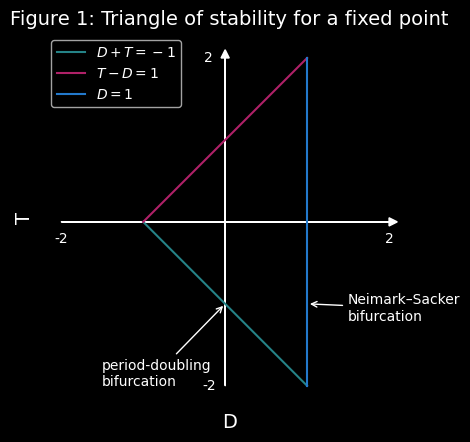

In [2]:
d =np.linspace(-1,1,100)
fig ,ax = plt.subplots()
c1 = lambda D: -1-D
c2 = lambda D: 1+D
plt.plot(d, c1(d), c=colors[1], label = r"$D+T=-1$")
plt.plot(d, c2(d), c=colors[8], label = "$T-D=1$")
plt.plot([1,1],[-2,2], c=colors[3], label = "$D=1$")
x_high = 2
x_low= -x_high
y_high = x_high
y_low= -x_high
lims = [[x_low, x_high],[y_low, y_high]]
nice_plots_orbit(fig,ax,lims)
plot_labels(ax,"Figure 1: Triangle of stability for a fixed point","D","T")
ax.annotate("period-doubling\nbifurcation", xy=(0, -1), xytext=(-1.5, -2.),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
ax.annotate("Neimark–Sacker\nbifurcation", xy=(1, -1), xytext=(1.5, -1.2),
            arrowprops=dict(facecolor='black', arrowstyle="->"))
plt.legend()

plt.show()

### Example calculation: 2 neurons with the Sigmoid function
Since we already know the origin to be a fixed point for certain parameter ranges, we can analyze the stability in this region. The derivative of the sigmoid function at the origin is equal to $$0.25$$ which gives the following relation for our weights along the flip bifurcation:

$$

\frac{1}{4} w_{11} - \frac{1}{16} w_{12}w_{21} = -1 \implies 4w_{11} - w_{12}w_{21} = -16
$$

By deciding that $$ w_{12} = -w_{21} $$ the expression above can be rewritten into $$4w_{11} + w_{12}^2 = -16$$. Furthermore, for the Neimark-Sacker bifurcation, we find the conditions,

$$
\begin{align*}
|\frac{1}{4} w_{11}| < 2 & \implies |w_{11}| < 8 \\
\left |\frac{1}{16} w_{12}w_{21}\right| < 1 & \implies |w_{12}w_{21}| < 16
\end{align*}
$$

By comparing the results from the two bifurcations, we obtain the following set of weights for the flip bifurcation:

$$
w_{12} = 2\sqrt{-4-w_{11} } \qquad -8 \leq w_{11} \leq -4
$$

and correspondingly for Neimark-Sacker,

$$
w_{12} = 4 \qquad -8 < w_{11} < 0
$$

where the upper boundary of $$w_{11}$$ is now only limited by our previous decision to keep $$w_{11}$$ negative.

## Fundamental Code for Simulating Orbits
In the code section below, the function ```nd_orbit()```, ```activation(x)```, ```neuron_orbiter()``` are defined. The function ```nd_orbit()``` is used to calculate the orbit of an n-dimensional map. It will be used to compute the orbit of both 2 and 3 neurons. ```activation(x)``` is the activation function f(x) as defined in equation (1). There are several possible activation functions that can be used, but for this investigation we will focus on the Sigmoid and the Tanh activation function. Lastly, ```neuron_orbiter()``` is used to calculate orbits of the N-neuron map. These functions are used to calculate orbits in all following figures. There are also some functions needed for plotting.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#import needed: numpy, pyplot, plotLayout
def nd_orbit(fnct, x0, it):
    # calculates orbits of n dimensional map
    # Where:
    #- param fnct: Mapping function mapping x0 to x1 taking a single parameter
    #- param x0: Initial value
    #- param it: Number of iterations
    #- returns: The entire orbit, including the initial value
    #   Initialize
    orbit = np.zeros((it+1,len(x0)))
    orbit[0]=x0
    #   Main loop
    for i in range(1,it+1):
        orbit[i] = fnct(orbit[i-1])
    return orbit

# define common activation functions
active_tanh = lambda x: np.tanh(x)
active_sigma = lambda x:  1/(1+np.exp(-x))
activation = active_tanh #default

#import needed: numpy, pyplot, plotLayout, nd_orbit
def neuron_orbiter(x0, weightM,bias ,Nit=100, ntrans=10, act = activation):
    """
    Calculates the stable solution of the 2-neuron map.
    Parameters:
    - x0: Initial values, np.ndarray(N,1)
    - a: Weights of neurons, np.ndarray (N,N)
    - b: Bias of neurons, np.ndarray (N,1)
    - Nit: Number of iterations, int
    - ntrans: Number of transient steps to remove, int
    Returns: An array containing the orbit of the 2-neuron map without transients
    """
    linearmap = lambda x: (weightM @ act(x) + bias)

    #   Calculate orbit
    orbit = nd_orbit(linearmap, x0, Nit)
    orbit = orbit[ntrans:] #remove the transient (+1 to also remove initial condition)
    return orbit.T




## Chaos with two simple neurons

In this section we will apply different methods of studying dynamical behaviour on our system of two neurons. The parameter ranges we have used are based on our findings above but may extend to include more values to obtain a broader picture. We will first look at isoperiodic plots and visualise how orbits change in periodicity as we move along a set value for one or two of the weights. Then we are going to study the hysterisis and basin plot of an area with co-existing attractors. 

### Isoperiodic Plot
Isoperiodic plots show a field of periodicity with two of the parameters as the axes. We chose to vary the weights $$ w_{11} $$ and $$ w_{12} $$ along the $x$ and $y$ axes respectivly. Whils



Isoperiodic plots show a field of periodicity with two of the parameters as the axes. We chose to vary the weights $$ w_{11} $$ and $$ w_{12} $$ while keeping $$ w_{21} $$ constant and equal to $$-6$$. The plot is made by detecting periods for each set of values for $$ w_{11} $$ and $$ w_{12} $$. To limit the number of iterations, and therefore the computational costs, the code only checks for periodicity up until the value 10. Any periodicity that may be higher is labelled infinity and coloured black in the plot. These areas will in general represent areas of chaos. 

Figure 2 demonstrates the rich dynamics the two neurons experience for a range of weights. One can for instance follow the path along $$w_{12}=6$$ where the attractors undergo a change from being a period-4 attractor to a quasi-periodic with a period 3 attractor, then a period 4 attractor again, then a period 8 attractor, and eventually a chaotic attractor as it reaches the black region at approximately $$w_{11}=-11$$. A simulation of the stable orbits along this path is demonstrated below in Figure 3.

The code below defines the necessary functions, most significantly ``` detect_period ``` and ``` find_p ``` that are responsible for generating the grid of periodicity, and variables to create the plot. The plot is presented in Figure 2. A limitation of the code is that it only simulates Nit=300 iterations per point for some higher period orbits may not have become stable enough to be detected.

### Figure 2: 3D Isoperiodic Plot for 2 Neurons where $z=frame=w_{21}=0 \rightarrow -10$
See Figure 3 for Legend

![](media/ColorMapCrossSection_chaos.gif)

### Figure 3: Isoperiodic Plot with $w_{21}=-6$

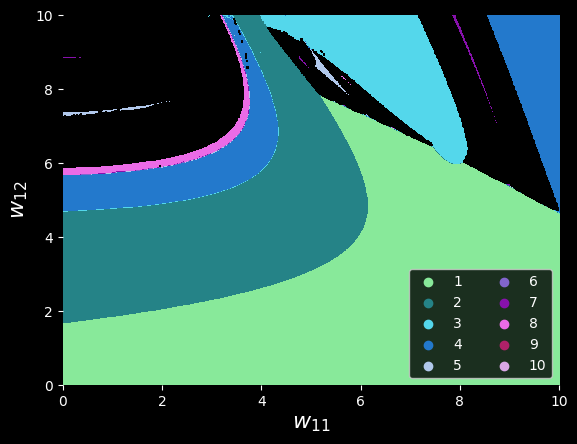

In [21]:
import matplotlib.colors 
import matplotlib.cm
#load in data
im = np.load('data/800resChaos_isoperiod.npy')

#qualatative cmap for periods between 1,10
colors = ["#88e99a", "#258387", "#54d7eb", "#2379cc", "#b1c8eb", "#8265cd", "#8711ac", "#eb6be6", "#af2168", "#daa7e7"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.Normalize(vmin=1, vmax=10)
# boundaries = np.arange(1, 12)  # 1 through 10 with a boundary after 10
# norm = matplotlib.colors.BoundaryNorm(boundaries, cmap.N, clip=True)


#plot
fig, ax = plt.subplots()
plt.imshow(im,cmap=cmap,norm=norm,origin='lower',extent=paramspace.ravel(),aspect='auto')
#customize plot
plt.style.use('dark_background')
ax.set_xlabel(r'$w_{11}$', fontsize = 16)
ax.set_ylabel(r'$w_{12}$', fontsize = 16)
# ax.set_title(r"Figure 3: Isoperiod Plot Showing Chaotic Behavoir", fontsize = 16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Create custom legend for periods
for i, color in enumerate(colors):
    ax.scatter([], [], c=color, label=f"{i+1}")
# ax.scatter([], [], c='black', label='quasi-periodic')
# Create a legend
ax.legend(scatterpoints=1, ncol=2, loc='lower right')
plt.show()

### Figure 4: Bifrucation plot showing orbits along $$w_{11}$$ for $$w_{12}=-w_{21}=6$$
![](media/BifrucationPlotter2D_chaos.gif)

<img src="image-20241031-174825.png" width="" align="" />

##### Key Functions Involved

In [5]:
from tqdm import tqdm

def detect_period(orbit, tolerance=1e-2):
    """
    Loops through given orbit and detects periodicity of attractors, labelling any periodicity above 'psearch' as chaos.
    Parameters:
    - orbit: solution of the neuron-2 map after transients. type: (n,2)darray
    - tolerance: desired accuracy for determining whether to elements in the array are equal. default: 1e-12
    Returns: period of the attractor the orbit found. type: int or np.inf
    """
    # Loop through the orbit and find repeating patterns
    for period in range(1, psearch):
        if np.allclose(orbit[-period:], orbit[-2*period:-period], atol=tolerance):
            return period
    return np.inf  # Return infinity if no period is found


def find_p(params1, params2,W,B):
    """ 
    Determines the periodicity of an orbit for ranges of parameters. Returns a grid of periodicity corresponding to a set of parameters.
    Parameters:
    - params1: array of one type of parameter to vary, corresponds to the first axis in an isoperiodic plot. type: ndarray (n,1)
    - params2: array of another type of parameter to vary, corresponds to the second axis in an isoperiodic plot. type: ndarray (n,1)
    - W: function, returns the weight matrix (2x2 array) with first row corresponding to given input.
    - B: function, returns the array of biases (2x1 array) with elements corresponding to given input.
    Returns: periods, type: (n,n)darray
    """
    periods = np.zeros((params1.shape[0], params2.shape[0]))

    for i, p1 in tqdm(enumerate(params1)):
        for j, p2 in enumerate(params2):
            w = W(p1, p2)
            b = B(p1, p2)
            periods[j, i] = detect_period(neuron_orbiter(x0,w,b,Nit,10).T)
    return periods


##### Code Used to Generates Figure 2,3,4

In [22]:
slices = {}
resolution = 20
params1 = np.linspace(*paramspace[0],resolution)
params2 = np.linspace(*paramspace[1],resolution)
thirdvar_range = np.linspace(0,-20,3)
for w21 in thirdvar_range:

    # W = lambda p1,p2: np.array([[p1,p2],
    #                         [thirdvar,0]])
    slices[f"w21_{w21}"] = find_p(params1, params2, W,b)
# np.savez("data/chaoticslices_full_r200_z100.npz", **slices) #save stack of arrays

20it [00:00, 48.56it/s]
20it [00:00, 49.43it/s]
20it [00:00, 47.97it/s]


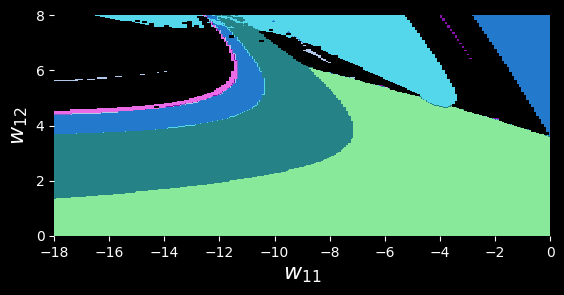

In [8]:
data = np.load("data/chaoticslices_full_r200_z100.npz")
#warning old data is rotated 90degrees
import matplotlib.colors 
import matplotlib.cm
#load in data
# im = np.load('data/800resChaos_isoperiod.npy')
plt.style.use('dark_background')

#qualatative cmap for periods between 1,10
colors = ["#88e99a", "#258387", "#54d7eb", "#2379cc", "#b1c8eb", "#8265cd", "#8711ac", "#eb6be6", "#af2168", "#daa7e7"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.Normalize(vmin=1, vmax=10)


#creates the images (can be done outside of scene if correct naming is used)
# Function to generate a color map from 2D data and save it as an image
def create_colormap_image(data_slice, z_index):
    fig, ax = plt.subplots()
    plt.imshow(data_slice, cmap=cmap,norm=norm,origin="lower",extent=paramspace.ravel())
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    ax.set_xlabel(r'$w_{11}$', fontsize = 16)
    ax.set_ylabel(r'$w_{12}$', fontsize = 16)
    # ax.set_title(r"Isoperiod Plot", fontsize = 16)
    #plt.axis('off')  # Remove axis
    # Save the plot as an image
    if z_index == z_size-70: #show a slice for proof it works
        plt.show()
    # plt.savefig(f"junk/slice_{z_index}.png", bbox_inches='tight', pad_inches=0)
    plt.close()
paramspace = np.array([[-18,0],[0,8]])

stack = np.stack([data[key] for key in data],axis=-1)
x_size, y_size, z_size = stack.shape
keys = data.keys()

# Create color map images for each slice along the z-axis
for z_slice in range(z_size):
    create_colormap_image(stack[:, :, z_slice], z_slice)
noframes = z_size
# %manim -ql -v WARNING --disable_caching --format gif ColorMapCrossSection

In [4]:
activation = active_sigma #activation function
#define parameter
w21 = -6
x0 = np.array([-1,1]) #starting point
# p1=w11 and p2=w12 are the two varied params 
W = lambda p1,p2: np.array([[p1,p2],
                            [w21,0]])
#making b lambda makes code more genral
b = lambda p1,p2: np.array([-3,4])

resolution = 50
Nit = 300 #no of iteratios per point
psearch = 10 #higherst period to search for
#set up the parameter space to be searched
paramspace = np.array([[-18,0],[0,8]])
params1 = np.linspace(*paramspace[0],resolution)
params2 = np.linspace(*paramspace[1],resolution)
#find the periods
im = "find_p(params1, params2, W,b)"


In [9]:
class BifrucationPlotter2D():#Scene):
    """Animation which plots an orbit in each frame and varys a parameter

    Args:
    !! need to be set outside scene 
        #axis params
        x_high = 2.05
        x_low= -x_high
        y_high = x_high
        y_low= -x_high
        xtick = int(np.round((x_high-x_low)/3,0))
        ytick = int(np.round((y_high-y_low)/3,0))

        run_time = 10
        display_axes  = 1
        param_range, func = rotationMbi() #the orbitfunction(x0)
        #animate it
        %manim -ql -v WARNING --disable_caching  BifrucationPlotter2D
    """
    def construct(self):
        #get colour map and function which returns color based on position
        viridis_cmap = matplotlib.colormaps['viridis'] #get color map
        def point_to_color(x, y):
            normed_value = norm(x+y) # Use both coordinates for color mapping
            color = viridis_cmap(normed_value)
            return list(color[:3]) #get rid of alpha channel
        #create axis even if not shown important for scaling
        x_range = y_range= [ x_low,x_high, xtick]
        y_range= [y_low, y_high, ytick]
        axis_length = 7
        axes = Axes(
            x_range=x_range,
            y_range=y_range,
            x_length=axis_length,
            y_length=axis_length,
            axis_config={"include_numbers": True}  # Display numbers on axes
        )
        if display_axes: self.play(Create(axes))

        #create grid of dots
        grid_size = 5  # number of points along each grid size
        x_coords =  y_coords = np.linspace(x_range[0], x_range[1], grid_size)
        y_coords = np.linspace(y_range[0], y_range[1], grid_size)
        dots_coord = [np.array([x,y]) for x in x_coords for y in x_coords]

        #create colors based on location
        normarray = x_coords+y_coords #for colors
        norm = matplotlib.colors.Normalize(vmin=normarray.min(), vmax=normarray.max())
        colors = [ManimColor.from_rgb(point_to_color(x, y)) for x in x_coords for y in x_coords]
        
        # Parameter setup which will contiouly vary between frames
        param_tracker = ValueTracker(param_range[0])

        #display parmeter
        text = Tex(f"$\\alpha$ =")
        number = DecimalNumber(param_tracker.get_value())
        number.to_edge(UP + RIGHT)     
        text.next_to(number, LEFT, buff=0.5)   

        # Plane and labels
        #plane = NumberPlane(x_range=[-2, 2], y_range=[-2, 2], background_line_style={"stroke_opacity": 0.5})
        #self.add(plane)

        # Dcreate dots for the orbit of each point in grid
        orbit_dotsall =[]
        for i, x0 in enumerate(dots_coord):
            color = colors[i]  # Assign color based on the index
            orbit_dots = VGroup(
                *[Dot(point=axes.c2p(*point), radius=0.05, color=color) for point in func(param_tracker.get_value(), x0)]
            ) #func is the orbit generator
            orbit_dotsall.append(orbit_dots)

        # Add all dots to the scene
        self.add(*orbit_dotsall)

        # Set up updaters to update the position of each dot group as the parameter changes
        for i, x0 in enumerate(dots_coord):
            orbit_dotsall[i].add_updater(
                lambda mob, x0=x0, i=i: mob.become(
                    VGroup(
                        *[Dot(point=axes.c2p(*point), radius=0.05, color=colors[i]) for point in func(param_tracker.get_value(), x0)]
                    )))

        #update number
        number_animation = UpdateFromFunc(
            number,
            lambda m: m.set_value(param_tracker.get_value()))
        #animate it
        self.add(number,text)
        self.play(number_animation,param_tracker.animate.set_value(param_range[1]), rate_func=linear, run_time=run_time)  # Adjust final mu value
        self.wait(1)


def generate_orbit(param, x0, W,b,activ,steps=50):
    #orbit generator but add extra empty z coord for manim
    transient_steps = 20
    orbit = neuron_orbiter(x0, W(param), b(param), steps,transient_steps,activ)
    orbit = (np.concatenate([orbit, np.zeros((1,orbit.shape[1] ))]))
    return orbit.T

In [10]:
def figure1chaosbi():
    w11, w12 = -18,6
    w21 = -6
    W =  lambda w11: np.array([[w11,w12],
                    [w21,0]])
    b =  lambda param: np.array([-3,4])
    param_range = [6,-18]
    return param_range, lambda param, x0: generate_orbit(param, x0, W,b,active_sigma,steps=200)
#Generate Animation
#axis params
x_high = 10.1
x_low= -x_high
y_high = x_high
y_low= -x_high
xtick = int(np.round((x_high-x_low)/2,0))
ytick = int(np.round((y_high-y_low)/2,0))

run_time = 10
display_axes  = 1
param_range, func = figure1chaosbi() #the orbitfunction(x0)
#animate it
# %manim -ql -v WARNING --disable_caching --format gif BifrucationPlotter2D 

### Basins of attraction and hysterisis plots

As mentioned earlier, and also visualized in for instance figure 4 for $$w_{11} \approx -6$$, there exists areas in the parameter space with co-existing attractors. Such areas are interesting to study through hysterisis and basin plots. The code below consists of the functions ```average_step_norm``` and ```basin_producer``` which are responsible for calculating the average distance between steps in an orbit after transients depending on the initial conditions provided. We also have the hysterisis function which returns the orbit for the parameters resulting in co-existing attractors.

For the plots we have chosen the parameters $$w = [[-16,8], [-8, 0]] $$ with $$b=[-0.45,3.9]$$ as these give rise to a period-2 attractor coexisting with a chaotic attractor. 

The basin plot shows the dependence on initial conditions for where the neurons end up: in the chaotic attractor (black) or the period-2 attractor (white). One can also see the fractal basins that exists along the boundaries between the chaos and the stable attractor. These are visualized by the red and yellow colours in the plot. 


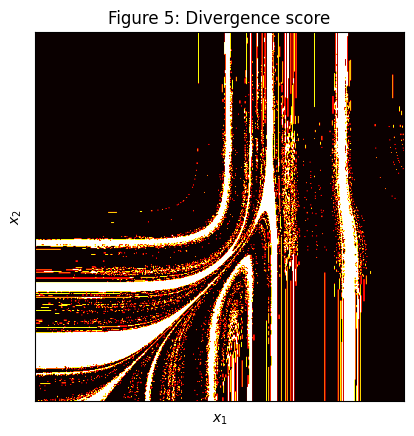

In [11]:
def average_step_norm(x0,a, b, f):
    """
    Calculates the average stepsize of the solution (2-neuron orbit).
    Parameters:
    - x0: inital values (positions) of neuron 1 and neuron 2, type: (1,2)array
    - a: weights of neurons, type: (2,2)array
    - b: biases of neurons, type: (1,2)array
    - f: activation function of choice, takes parameter 'x' of type float, returns float 
    Returns: average distance netween neurons , type: float
    """
    #   Initialise
    orbit = neuron_orbiter(x0,a, b, act=f).T
    #   Calculate
    distance = np.linalg.norm(np.transpose(orbit[1:])-np.transpose(orbit[:-1]))
    mu = 1/len(orbit[:-1]) * np.sum(distance)
    return mu

def basin_producer(a, b, xsteps, ysteps, func):
    """ 
    Calculates average stepsize of neuron orbit solution using each coordinate of a grid as initial condition. 
    Parameters: 
    - a: weights of neurons, type: (2,2)array
    - b: biases of neurons, type: (1,2)array
    - xsteps: acitivty space along the first axis, type: (1,n) array
    - ysteps: acitivty space along the second axis, type: (1,n) array
    - func: function to calculate average stepsize, takes parameters initial condition (1x2 array), weights (2x2 array), biases (1x2 array); returns type float
    Returns: grid of average stepsizes, type: (n,n) meshgrid
    """
    #   Initialise
    [xs,ys] = np.meshgrid(xsteps, -ysteps)

    #   Calculate
    mu_grid = np.zeros_like(xs)
    
    for i in tqdm(range(len(xsteps))):
        for j in range(len(ysteps)):
            mu_grid[i,j] = func([xs[i,j], ys[i,j]], a, b, active_sigma)

    return mu_grid

#run it

x = y = np.linspace(-12,8, 501)
w = [[-16,8], [-8, 0]]
b = [-0.45,3.9]
# basinGridT1 = basin_producer(w, b, x, y, average_step_norm) #takes 5 mins
# np.save("data/basinplot.npy", basinGridT1) #save for later

plt.style.use('default')
basinGridT1 = np.load("data/basinplot.npy")
fig, ax = plt.subplots(ncols=1)
ax.imshow(basinGridT1<0.851,cmap='hot',extent=(-12,8,-12,8))
ax.set_title('Figure 5: Divergence score')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()

Figure 6 portrays the hysterisis plot for the orbit with our chosen parameters. The purple dots visualize the chaotic attractor while the two green dots show the period-2 attractor. 

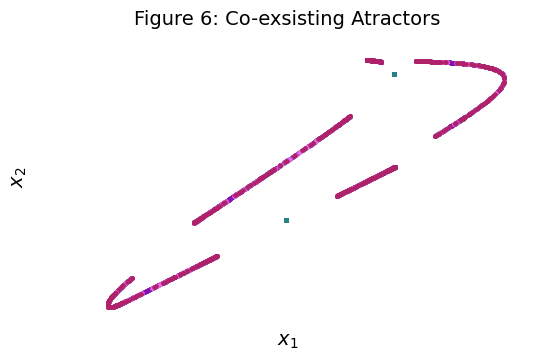

In [12]:
def hysterisis(x0):
    #parameters needed for coexsisting atractors exampple

    W =  np.array([[-16,8], [-8, 0]])
    b =  np.array([-0.45,3.9])

    orbit = neuron_orbiter(x0,W,b,1000,100,active_sigma)
    return orbit

fig ,ax = plt.subplots()
viridis_cmap = matplotlib.colormaps['viridis'] #get color map
def point_to_color(x, y):
    normed_value = norm(x+y) # Use both coordinates for color mapping
    color = viridis_cmap(normed_value)
    return list(color[:3]) #get rid of alpha channel
x_high = 8
x_low= -12#x_high
y_high = x_high
y_low= x_low
#create axis even if not shown important for scaling
x_range = y_range= [ x_low,x_high, xtick]
y_range= [y_low, y_high, ytick]

#create grid of dots
grid_size = 3  # number of points along each grid size
x_coords =  y_coords = np.linspace(x_range[0], x_range[1], grid_size)
y_coords = np.linspace(y_range[0], y_range[1], grid_size)
dots_coord = [np.array([x,y]) for x in x_coords for y in x_coords]

#create colors based on location
normarray = x_coords+y_coords #for colors
norm = matplotlib.colors.Normalize(vmin=normarray.min(), vmax=normarray.max())
colors = [point_to_color(x, y) for x in x_coords for y in x_coords]
colors = ["#88e99a", "#258387", "#54d7eb", "#2379cc", "#b1c8eb", "#8265cd", "#8711ac", "#eb6be6", "#af2168", "#daa7e7"]

lims = [[-10, 4],[-4, 4]]
nice_plots_orbit(fig,ax,lims)
plot_labels(ax, "Figure 6: Co-exsisting Atractors", r"$x_1$",r"$x_2$")
orbits = []
for i,dot_c in enumerate(dots_coord):
    # plt.scatter(dot_c[0],dot_c[1],s=10, c=colors[i])
    orbit = hysterisis(dot_c)
    #need to add 0 z coord for each coordinate
    plt.scatter(orbit[0],orbit[1],s=5, c=colors[i])


These results visualise how sensitive a system can be to initial conditions for certain parameters. An application of this study could be to determine how an external stimulus may change the orbit of a system from periodic to chaotic.

## The Rotation Matrix
$$ 
\begin{align}
w=Df_{(\alpha,\varphi)}(0)=\left(\begin{array}{cc} w_{11} & w_{12} \\ w_{21} & w_{22}\end{array}\right)=\alpha\cdot\left(\begin{array}{cc} \cos(\varphi) & \sin(\varphi) \\ -\sin(\varphi) & \cos(\varphi)\end{array}\right)
\end{align}
$$

This section will look at how we can generate sinusoidal patterns with two neurons by using a weight matrix corresponding to alpha times a rotation of phi. This is of interest as many biological systems have sinusoidal oscillations such as central pattern generators which are used for motor control. Systems with these weights undergo Neimark−Sacker bifrucations as seen in the isoperiodic plot of figure 10 below where the black area represents quasi-periodic orbits.



### Orbit plots:

Below we provide the code to plot the orbits of 2 neurons with the rotation matrix as weights. We also visualise the corresponding trajectory of the two neurons with respect to time in figure 8. As the two figures demonstrate, by applying the rotation matrix onto a system of 2 neurons, we can recreate sinusoidal shapes with frequencies dependent on $\varphi$. This simple 2 neuron system can give us insight to how central pattern generators can be used for motor control. One can also imagine how combining several pairs of neurons operating at different frequencies could be used to approximate any periodic function. This is an example of the Universal Approximation Theorem. 

### Figure 9: Animated Orbit Plot Showing Harmonic Behavoir at Different Frequencies
<div style="display: flex; align-items: center; justify-content: space-around;">
  <div style="text-align: center;">
    <h3>α=1.05 , φ= 0.1</h3>
    <img src="media/GridOrbitAnimation_rotationcircle.gif" alt="Title 1" >
  </div>
  <div style="text-align: center;">
    <h3>α=1.05 , φ= 0.2</h3>
    <img src="media/GridOrbitAnimation_fast.gif" alt="Title 2" >
  </div>
  </div>
<div style="display: flex; align-items: center; justify-content: space-around;">
  <div style="text-align: center;">
    <h3></h3>
    <img src="media/phi01.png" alt="Title 1" >
  </div>
  <div style="text-align: center;">
    <h3></h3>
    <img src="media/phi02.png" alt="Title 2" >
  </div>
</div>

##### Code Used to Generate Figure 9 
1. Manim Animation Scene
2. Manim execution with parameter setup
3. MPL orbit plot showing in Figure 9 lower

In [13]:
class GridOrbitAnimation():#Scene): #doesnt work w/o manim scene class here
    """Generates a grid of points coloured by location which then evolve discretely 
        animation done using the manim library and needs to be run using cell magic
    Args:
    !!need to be set outside of scene as globals due to how cell magic works
        #axis params
        x_high = 1.5
        x_low= -x_high
        y_high = x_high
        y_low= -x_high
        xtick = int(np.round((x_high-x_low)/3,0))
        ytick = int(np.round((y_high-y_low)/3,0))
        
        steps = 80 #how many time steps to show
        display_axes  = False
        func = rotationM #/figure1chaos #the orbitfunction(x0)
        #animate it
        %manim -ql -v WARNING --disable_caching GridOrbitAnimation
    """
    def construct(self):
        viridis_cmap = matplotlib.colormaps['viridis'] #get color map
        def point_to_color(x, y):
            normed_value = norm(x+y) # Use both coordinates for color mapping
            color = viridis_cmap(normed_value)
            return list(color[:3]) #get rid of alpha channel
        #create axis even if not shown important for scaling
        x_range = y_range= [ x_low,x_high, xtick]
        y_range= [y_low, y_high, ytick]
        axis_length = 7
        axes = Axes(
            x_range=x_range,
            y_range=y_range,
            x_length=axis_length,
            y_length=axis_length,
            axis_config={"include_numbers": True}  # Display numbers on axes
        )
        if display_axes: self.play(Create(axes))

        #create grid of dots
        grid_size = 20  # number of points along each grid size
        x_coords =  y_coords = np.linspace(x_range[0], x_range[1], grid_size)
        y_coords = np.linspace(y_range[0], y_range[1], grid_size)
        dots_coord = [np.array([x,y]) for x in x_coords for y in x_coords]

        #create colors based on location
        normarray = x_coords+y_coords #for colors
        norm = matplotlib.colors.Normalize(vmin=normarray.min(), vmax=normarray.max())
        colors = [ManimColor.from_rgb(point_to_color(x, y)) for x in x_coords for y in x_coords]
        
        
        #calculate orbits for each dot
        orbits = []
        for dot_c in dots_coord:
            orbit = func(dot_c)
            #need to add 0 z coord for each coordinate
            orbits.append(np.concatenate([orbit, np.zeros((1,orbit.shape[1] ))]))
        
        manim_orbits = [axes.c2p(*(orbit)) for orbit in orbits] #scale onto manim axes
        #create actual dots at starting positions
        dots = VGroup(*[Dot(orbit[:,0],radius=0.05,color=colors[i]) for i ,orbit in enumerate(manim_orbits)])
        self.play(Create(dots))

        #move dots about to create animation
        num_steps = steps#30#orbits[0].shape[1]
        for t in range(num_steps):
            if t == 1: self.wait(0.5)
            for i, dot in enumerate(dots):
                #use c2p again to make sure correclty scaled
                dot.move_to(axes.c2p(*orbits[i][:,t]))  
            self.wait(0.2)  # pause to visualize each time step
    

In [14]:
def rotationM(x0):
    #a scaled rotation matrix (pretty)
    alpha = 1.05
    W = lambda theta: alpha * np.array([[np.cos(theta),np.sin(theta)],
                        [-np.sin(theta),np.cos(theta)]])
    b = np.array([0.,0.])
    orbit = neuron_orbiter(x0,W(np.pi*0.1),b,100,0,active_tanh)
    return orbit

def figure1chaos(x0):
    #chaotic behavoir from figure1 passman
    w11, w12 = -18,8
    w21 = -6
    W =  np.array([[w11,w12],
                    [w21,0]])
    b =  np.array([-3,4])
    orbit = neuron_orbiter(x0,W,b,100,0,active_sigma)
    return orbit

#Generate Animation
#axis params
x_high = 0.5
x_low= -x_high
y_high = x_high
y_low= -x_high
xtick = .5#int(np.round((x_high-x_low)/3,0))
ytick = .5#int(np.round((y_high-y_low)/3,0))

steps = 80 #how many time steps to show
display_axes  = True
func = rotationM #/figure1chaos #the orbitfunction(x0)
#animate it
#%manim -ql -v WARNING --disable_caching --format gif GridOrbitAnimation

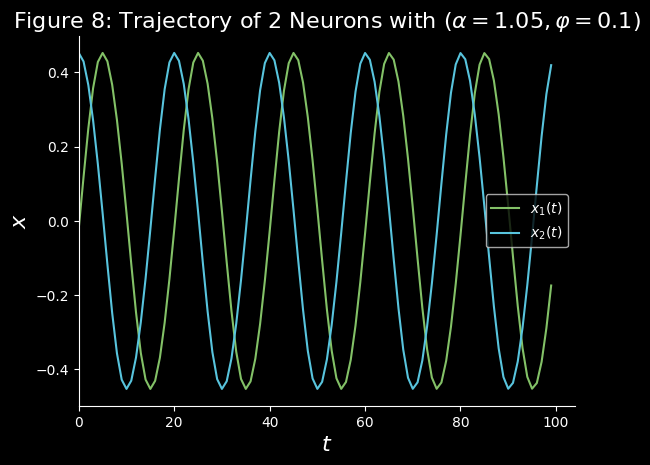

In [15]:
x0 = np.array([0.,0.1])
alpha = 1.05
theta = 0.1
rotationMW = lambda alpha, theta: alpha * np.array([[np.cos(theta),np.sin(theta)],
                    [-np.sin(theta),np.cos(theta)]])
b = np.array([0.,0.])
orbit = neuron_orbiter(x0,rotationMW(alpha,theta*np.pi),b,10000,100, active_tanh)
fig, ax = plt.subplots()
ax.scatter(orbit[0,:],orbit[1,:],c='#58C4DD',s=3)

x_high = 0.5
x_low= -x_high
y_high = x_high
y_low= -x_high
lims = [[x_low, x_high],[y_low, y_high]]
nice_plots_orbit(fig,ax,lims)
plot_labels(ax,f"Figure 7: Orbit of 2 Neurons with $(\\alpha = {alpha}, \\varphi={theta})$",r"$x_1$",r"$x_2$",16)
plt.close()#tight_layout() #static orbit plot

fig, ax = plt.subplots()
plt.plot(orbit[0,:100], label=r'$x_1(t)$',c='#83C167')
plt.plot(orbit[1,:100], label=r'$x_2(t)$',c='#58C4DD')
nice_plots_time(fig,ax)
plt.legend()
plot_labels(ax,f"Figure 8: Trajectory of 2 Neurons with $(\\alpha = {alpha},\\varphi={theta})$",r"$t$",r"$x$",16)
# plt.savefig("media/phi01")

### Isoperiodic plot 
Below you can find the code that defines necessary variables to construct the isoperiodic plot for a system influenced by the rotation matrix and the code that actually plots it. Figure 10 shows the results. The black areas represent in this case quasi-periodic orbits which are the result of Neimark-Sacker bifurcations. Another interesting observation one can make of this plot is that the quasi-periodicity occurs periodically along values of $$\alpha$$ for the chosen range of $$\phi$$. This may mean that the rotation matrix has an influence also on the structure of the chaos in a system. 

In [16]:
activation = active_tanh
# theta and p2=alpha are the two varied params 
W = lambda theta,p2 : p2 * np.array([[np.cos(theta),np.sin(theta)],
                    [-np.sin(theta),np.cos(theta)]])
#making b lambda makes code more genral
b = lambda theta,p2 :np.array([0.,0.])
x0 = np.array([0.1,0.1]) #starting point
resolution = 50 #50 takes 4seconds
Nit = 300
psearch = 10
paramspace = np.array([[0,np.pi],[0.9,3]])
params1 = np.linspace(*paramspace[0],resolution)
params2 = np.linspace(*paramspace[1],resolution)
im = find_p(params1, params2, W,b)

50it [00:02, 17.40it/s]


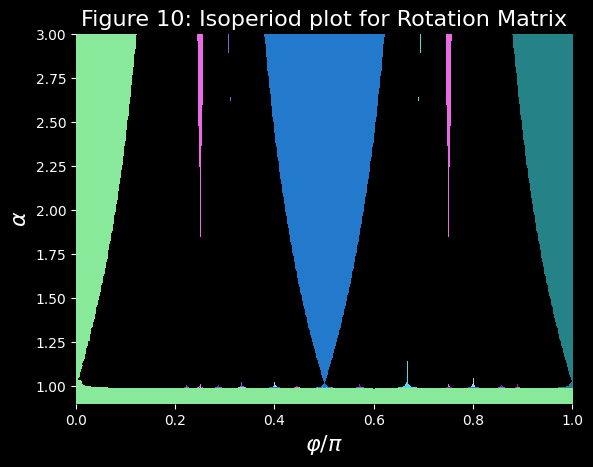

In [17]:
import matplotlib.colors 
import matplotlib.cm
#load in data
im = np.load('data/800resRotationMisoperiod.npy')

#qualatative cmap for periods between 1,10
colors = ["#88e99a", "#258387", "#54d7eb", "#2379cc", "#b1c8eb", "#8265cd", "#8711ac", "#eb6be6", "#af2168", "#daa7e7"]
cmap = matplotlib.colors.ListedColormap(colors)
norm = matplotlib.colors.Normalize(vmin=1, vmax=10)

#paramspace searched
paramspace = np.array([[0,1],[0.9,3]])

#plot
fig, ax = plt.subplots()
plt.imshow(im,cmap=cmap,norm=norm,origin='lower',extent=paramspace.ravel(),aspect='auto')
#customize plot
plt.style.use('dark_background')
ax.set_xlabel(r'$\varphi/\pi$', fontsize = 16)
ax.set_ylabel(r'$\alpha$', fontsize = 16)
ax.set_title(r"Figure 10: Isoperiod plot for Rotation Matrix", fontsize = 16)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
# Create custom legend for periods
for i, color in enumerate(colors):
    ax.scatter([], [], c=color, label=f"{i+1}")
# ax.scatter([], [], c='black', label='quasi-periodic')
# Create a legend
# ax.legend(scatterpoints=1, ncol=2, loc='lower right')
plt.show()

The animated orbit plot below demonstrates how attractors change in periodicity along the line where $$\phi=0.95$$ while $$\alpha$$ varies. At the start, there is one global fixed point attractor at the origin. Then a Neimark-Sacker bifurcation occurs and a quasi-periodic orbit of increasing anharmonicity appears. However the origin remains a fixed point. Then one leaves the black area in the isoperiodic plot and gets a periodic orbit. In the animation, there are two coexisting period 2 attractors (one yellow and the other green).


### Figure 11: Animations Showing Neimark-Sacker bifurcation as $\alpha$ is increased
<div style="display: flex; align-items: center; justify-content: space-around;">
  <div style="text-align: center;">
    <h3>φ= 0.45</h3>
    <img src="media/BifrucationPlotter2D045pigif.gif" alt="Title 1" >
  </div>
  <div style="text-align: center;">
    <h3>φ= 0.95</h3>
    <img src="media/BifrucationPlotter2D_ManimCE_v0.18.1.gif" alt="Title 2" >
  </div>
  </div>


##### Code for Figure 11

In [18]:
def rotationMbi():
    #sets params for orbit generation
    theta = 0.95*np.pi
    W = lambda param : np.array([[np.cos(theta),np.sin(theta)],
                        [-np.sin(theta),np.cos(theta)]]) * param
    b = lambda param : -np.array([-0.,0.])
    param_range = [0.8,3]
    return param_range, lambda param, x0: generate_orbit(param, x0, W,b,active_tanh,steps=50)

#Generate Animation
#axes params
x_high = 2.05
x_low= -x_high
y_high = x_high
y_low= -x_high
xtick = int(np.round((x_high-x_low)/3,0))
ytick = int(np.round((y_high-y_low)/3,0))

run_time = 10
display_axes  = 1
param_range, func = rotationMbi() #the orbitfunction(x0)
#animate it
#%manim -ql -v WARNING --disable_caching --format gif BifrucationPlotter2D 

## System of three neurons
In this project so far, we have discovered the vast range of dynamics possible with just two neurons. Below we additionally perform a quick exploration of the isoperidic fields for parameter ranges with three neurons. The first simulation varies the bias of neuron 1 while the second varies one of the weights, $$w_{13}$$. They show that similar chaotic and high-period behaviour can be found in three neuron systems. This is interesting to confirm as it strengthens our hypothesis that the chaotic properties 2-neuron systems display may also be emergent for higher dimensional systems.

### Figure 11: 3D Isoperiodic Plots for 3 Neurons
<div style="display: flex; align-items: center; justify-content: space-around;">
  <div style="text-align: center;">
    <h3>𝑏_1  is varied from 2 to -10</h3>
    <img src="media/ColorMapCrossSection_3N.gif" alt="Title 1" >
  </div>
  <div style="text-align: center;">
    <h3>𝑤_13  is varied from 0 to -10</h3>
    <img src="media/ColorMapCrossSection_3Nfig11.gif" alt="Title 2" >
  </div>
  </div>


##### Code for Figure 11
Animation can be done using the code used for 2D animations

In [19]:
## first plot params
w11,w12,w13 = -16, 4,4
w21 = w31= -6
x0 = np.array([-1,1,1])*0
W = lambda p1,p2: np.array([[w11,w12,w13],
              [w21,0,0],
              [w31,0,0]])
b0 = -3.4
b = lambda p1,p2: np.array([b0,p1,p2])


## 2nd plot params
w11,w12,w13 = -16, 0, 4
w21 = w31= -6
x0 = np.array([-1,1,1])*0
W = lambda p1,p2: np.array([[w11,p1,w13],
                            [w21,0,0],
                            [w31,0,0]])
b0 = -3.4
b = lambda p1,p2: np.array([-2,p2,3.4])
psearch =10
paramspace = np.array([[0,10],[0,10]])

##execution for 2nd plot
slices = {}
resolution = 200
params1 = np.linspace(*paramspace[0],resolution)
params2 = np.linspace(*paramspace[0],resolution)
w13range = np.linspace(0.,10,101)
for w13 in w13range:
    W = lambda p1,p2: np.array([[w11,p1,w13],
                            [w21,0,0],
                            [w31,0,0]])
    slices[f"w13_{w13}"] = "takes ages to run"#find_p(params1, params2, W,b)

## Conclusion

In conclusion, we can see how 2 neuron systems provide a rich reservoir of possible dynamics including any period, chaotic behaviour and sinosoidal rhythms. These are all accessible by tuning the parameters correctly. This tuning process is called learning however this is challenging for general Recurrant Neural Networks. One can imagine how more complex systems can use these different behaviours to adapt to a changing environment. We also found co-existing attractors which give rise to a hysteresis effect potentially serving as a kind of short-term memory. Finally, we found similar chaotic behaviour with three simple neurons which supports the notion that any properties of chaos in smaller systems may also emerge in higher dimensions.

## References
[1] GeeksforGeeks (2018). Introduction to Recurrent Neural Network. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/introduction-to-recurrent-neural-network/ [Accessed 28 Oct. 2024].

‌[2] F. Pasemann (2002). Complex dynamics and the structure of small neural networks. Network Computation in Neural Systems, [online] 13(2), pp.195–216. doi:https://doi.org/10.1088/0954-898x/13/2/303.

‌[3] GeeksforGeeks (2018). Activation functions in Neural Networks. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/activation-functions-neural-networks/ [Accessed 28 Oct. 2024].


#### AI disclaimers:
AI has been used in the following ways to aid this project,
$$\cdot$$ Concept clarification: Clarify concepts we were uncertain about
$$\cdot$$ Idea generation: Help with brainstorming setup for the project
$$\cdot$$ Debugging code: Help with understanding errors and issues in our code
$$\cdot$$ Pseudocode guidance: Generate pseudocode for the simulations using manim

Transcripts Are available in AI_Usage.txt. The large language Model used is:
OpenAI. (2023). ChatGPT (October 31, 2024 version) [Large language model]. OpenAI.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cf5352ca-9df4-4363-ba72-35646d90b16d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>